In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Regression

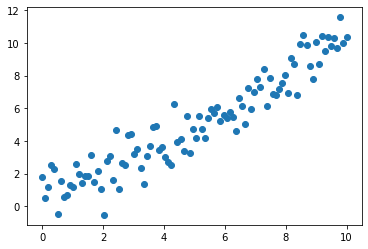

In [2]:
np.random.seed(0) # set the seed to alays have the same thing
samples = 100
Features = np.linspace(0,10, samples).reshape(samples,1)
target = Features + np.random.randn(samples, 1)
plt.scatter(Features, target)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
model.fit(Features, target)
model.score(Features, target)

0.8881140743377214

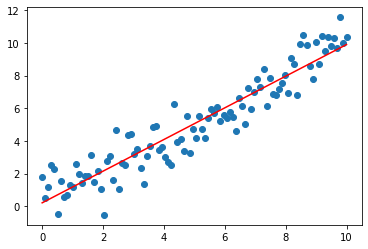

In [5]:
plt.scatter(Features, target)
#Plot the red line showing the predicted value of the model
plt.plot(Features, model.predict(Features), c='red')

# Classification

In [6]:
titanic = sns.load_dataset('titanic')

titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [7]:
from sklearn.neighbors import  KNeighborsClassifier

In [8]:
model = KNeighborsClassifier()
target = titanic['survived']
Features = titanic.drop('survived', axis=1)

In [9]:
model.fit(Features.values, target)
model.score(Features.values, target)

0.8305322128851541

# Survie proba

In [10]:
def survie(model,pclass : int, sex : int , age : int):
    feature = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(feature))
    print(model.predict_proba(feature))

In [12]:
survie(model, pclass=3, sex=0, age=50)

[0]
[[1. 0.]]


# Exercice

All scores are : 
[0.82352941 0.82212885 0.82913165 0.83473389 0.83053221 0.81652661
 0.81652661 0.80812325 0.81792717 0.80812325 0.80672269 0.78711485
 0.79971989 0.79411765 0.79551821 0.78571429 0.79131653 0.78571429
 0.78851541 0.78291317 0.78711485 0.76470588 0.76610644 0.75910364
 0.7605042  0.75210084 0.75910364 0.74509804 0.75910364]
Best score is 0.834733893557423 with n at : 4


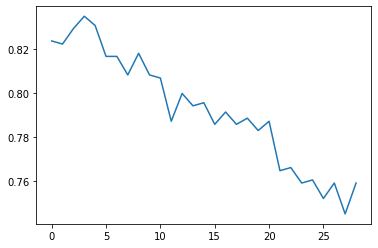

In [18]:
#test the best hyper parameters for KNeigborsClassifier
start = 1
limit = 30
scores = np.zeros(limit-1)
for i in range(1, limit):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(Features.values, target)
    scores[i-1] = model.score(Features.values, target)

print(f"All scores are : ")
print(scores)
print(f"Best score is {scores.max()} with n at : {scores.argmax()+1}")
plt.plot(scores)